# Generating graphs with as many integer eingenvalues as possible

In [117]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [127]:
def generate_graphs_with_one_cycle(n):
    return [G for G in graphs.nauty_geng(f"{n} {n} -c") if G.is_connected()]

In [128]:
def laplacian_matrix(G):
    return nx.laplacian_matrix(G).toarray() 

In [129]:
def check_integer_eigenvalues(L):
    eigenvalues = np.linalg.eigvals(L)
    integer_eigenvalues = [ev for ev in eigenvalues if np.isclose(ev, round(ev))]
    return integer_eigenvalues

In [130]:
def is_single_cycle(G):
    return len(G.edges()) == len(G.nodes) and nx.is_connected(G)

In [131]:
def is_graph_isomorphic(G1, G2):
    return nx.is_isomorphic(G1, G2)

In [134]:

def modify_graph(G, n):
    action = random.choice(['add', 'remove'])
    
    # Track added edges to prevent duplicates
    added_edges = set(G.edges())
    
    if action == 'add':
        # List all possible edges that are not already in the graph
        possible_edges = [(u, v) for u in range(n) for v in range(u + 1, n) if (u, v) not in added_edges and not G.has_edge(u, v)]
        
        if possible_edges:
            u, v = random.choice(possible_edges)
            G.add_edge(u, v)
            added_edges.add((u, v))  # Update the set of added edges
    
    elif action == 'remove' and len(G.edges()) > n:
        u, v = random.choice(list(G.edges()))
        G.remove_edge(u, v)
        added_edges.discard((u, v))  # Remove the edge from the added edges set
    
    while not nx.is_connected(G) or not is_single_cycle(G):
        if not nx.is_connected(G):
            components = list(nx.connected_components(G))
            u, v = random.choice(list(components[0])), random.choice(list(components[1]))
            G.add_edge(u, v)
            added_edges.add((u, v))  # Update the set of added edges
        elif not is_single_cycle(G):
            u, v = random.choice(list(G.edges()))
            G.remove_edge(u, v)
            added_edges.discard((u, v))  # Update the set of added edges
    
    return G


Step 1: Number of integer eingenvalues: 1


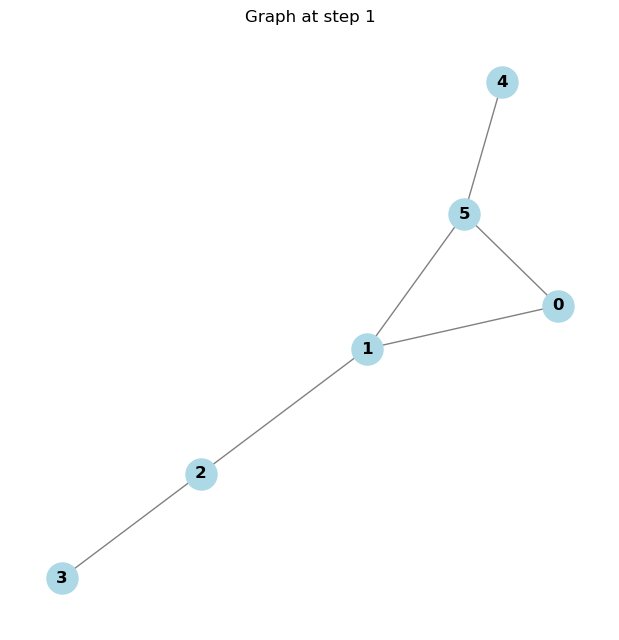

Step 2: Number of integer eingenvalues: 2


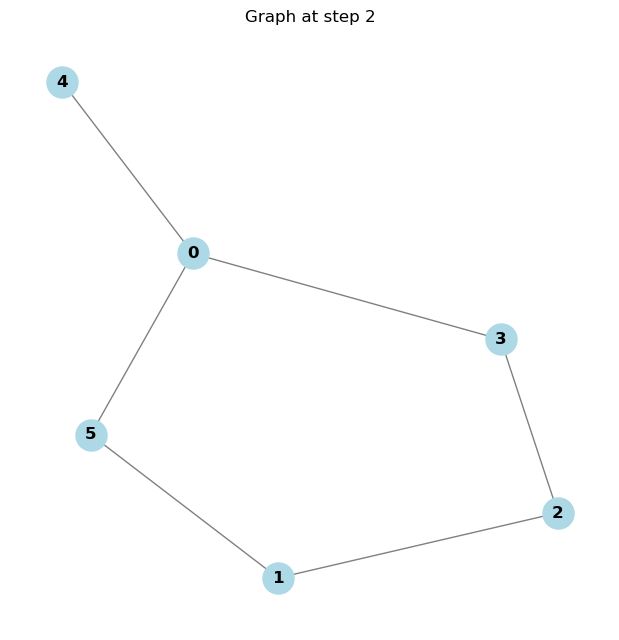

Step 3: Number of integer eingenvalues: 2


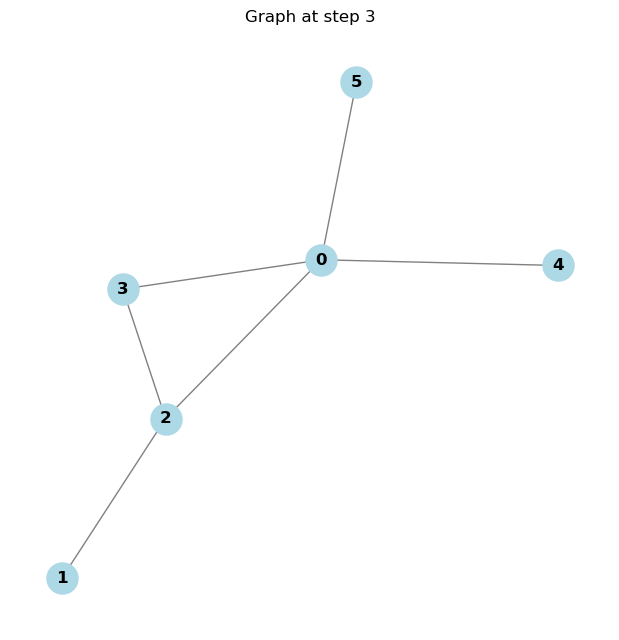

Step 4: Number of integer eingenvalues: 2


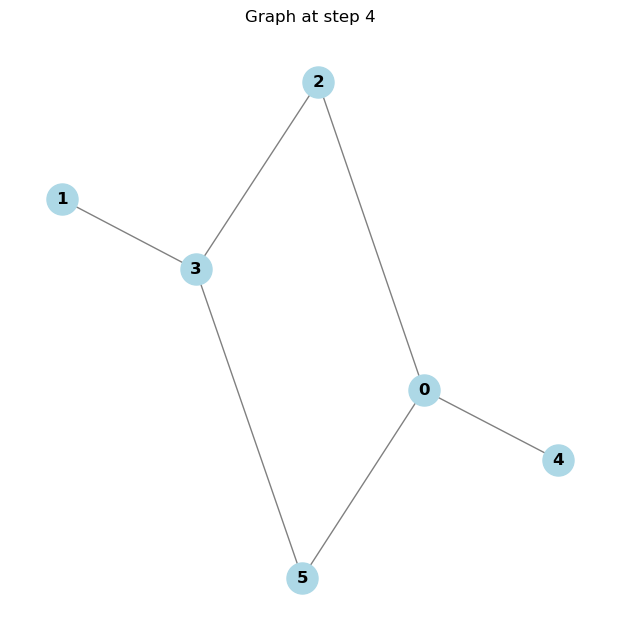

Step 5: Number of integer eingenvalues: 4


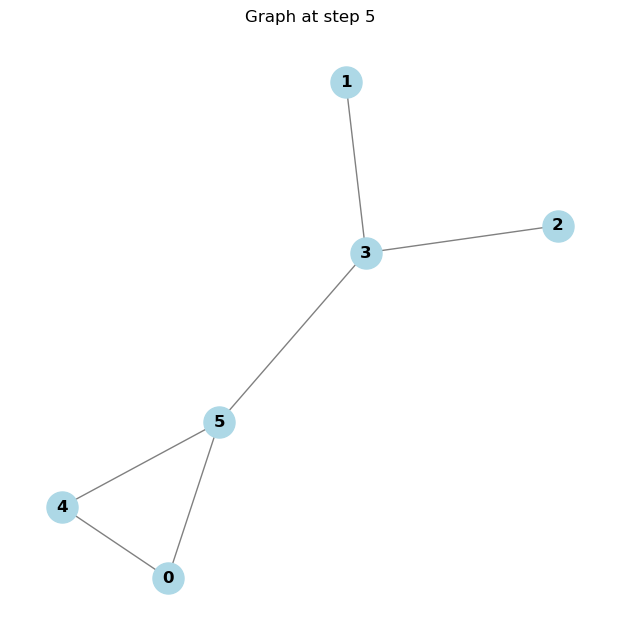

Step 6: Number of integer eingenvalues: 4


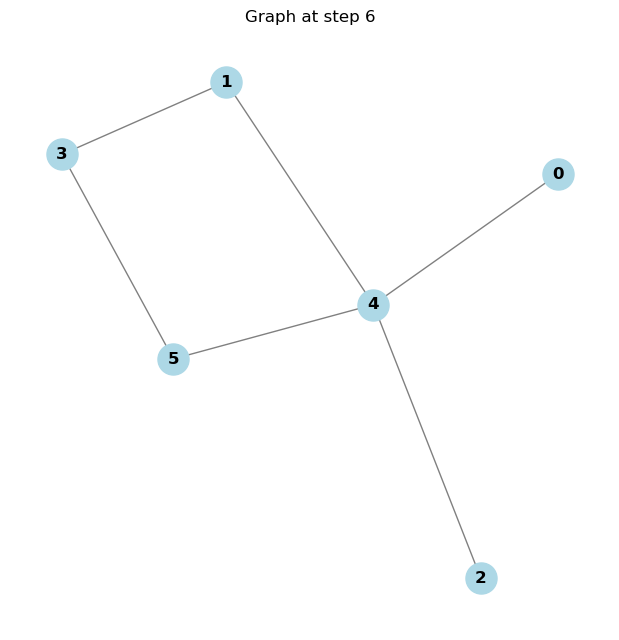

Step 7: Number of integer eingenvalues: 4


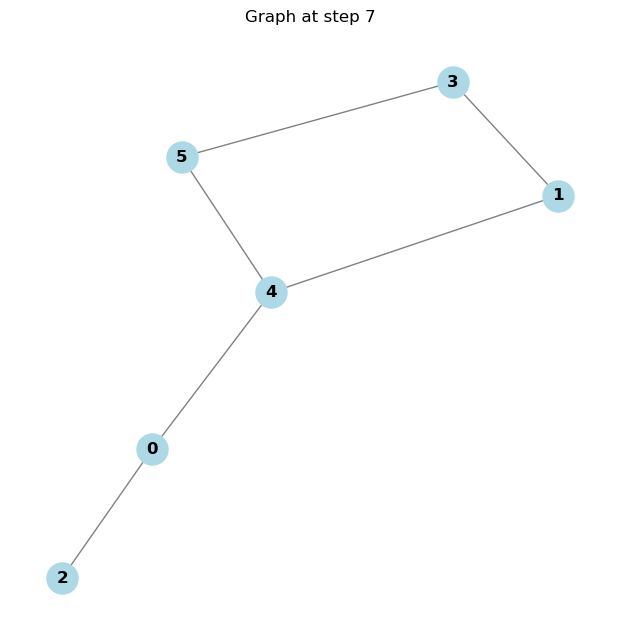

Step 8: Number of integer eingenvalues: 4


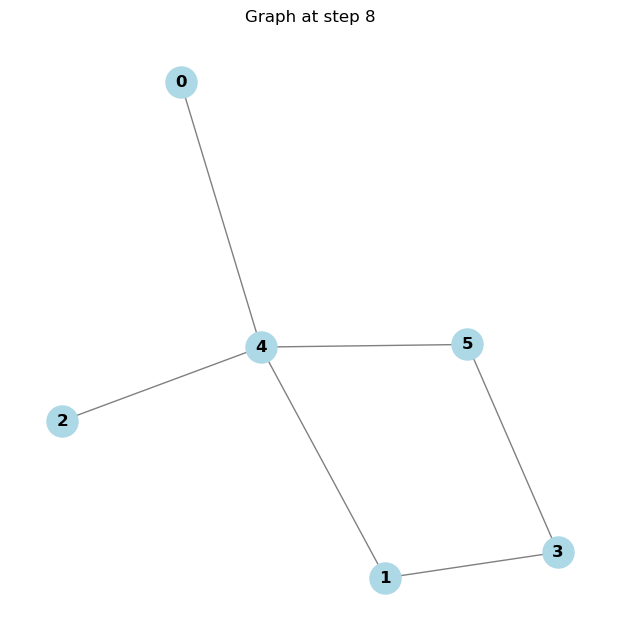

Step 9: Number of integer eingenvalues: 4


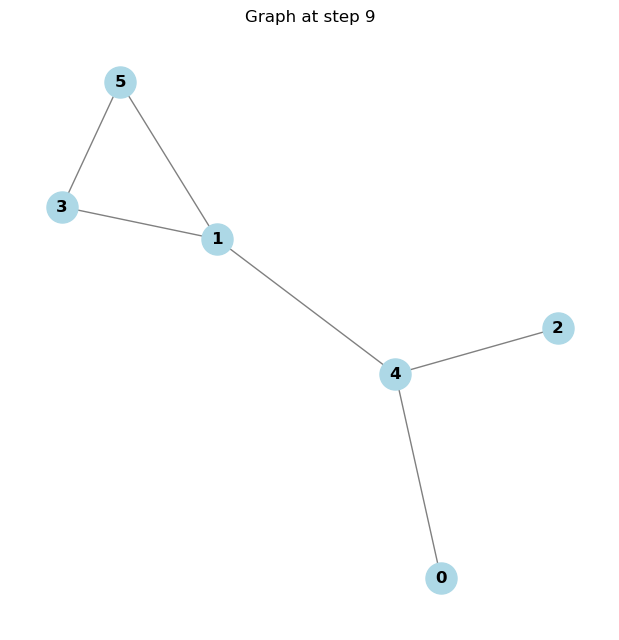

Step 10: Number of integer eingenvalues: 4


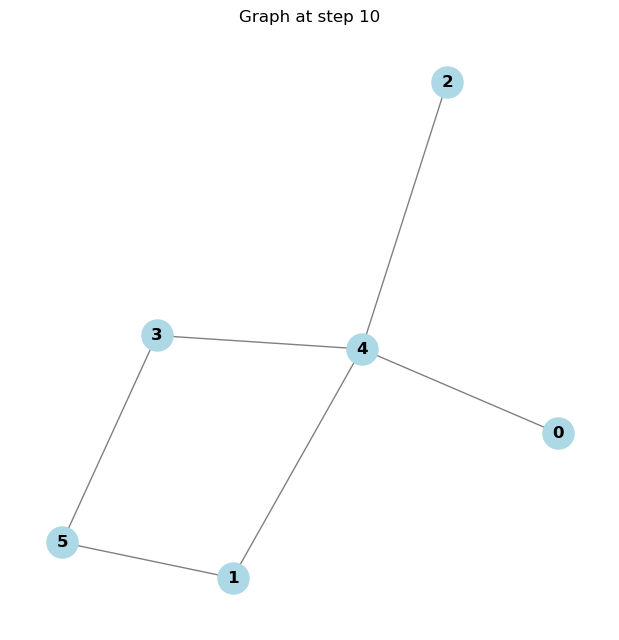

Step 11: Number of integer eingenvalues: 4


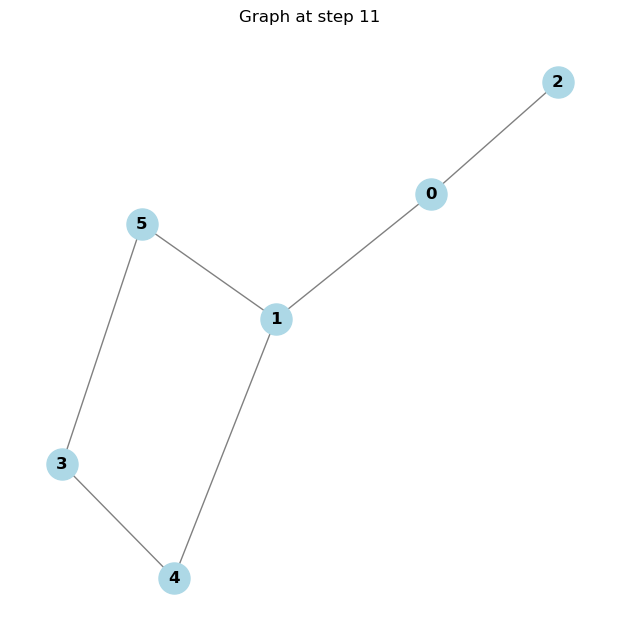

Step 12: Number of integer eingenvalues: 4


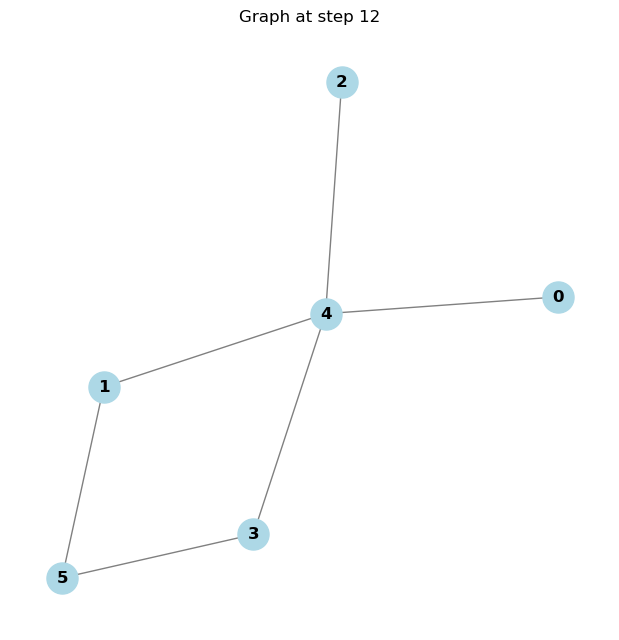

Step 13: Number of integer eingenvalues: 4


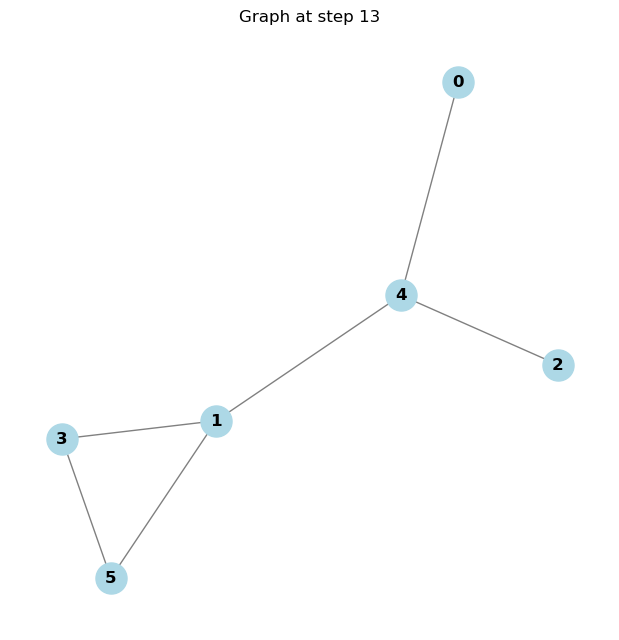

Step 14: Number of integer eingenvalues: 4


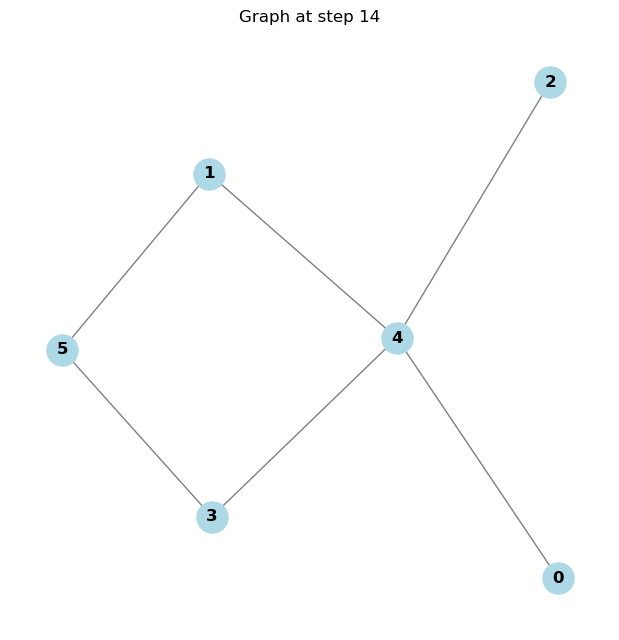

Step 15: Number of integer eingenvalues: 4


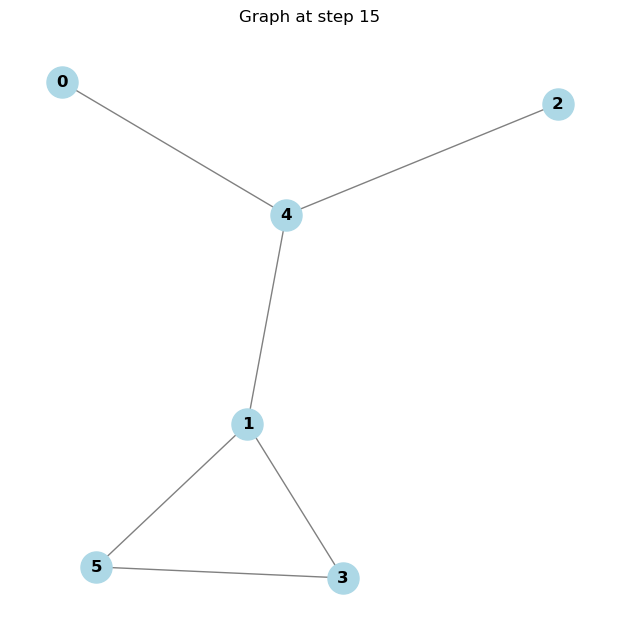

Step 16: Number of integer eingenvalues: 4


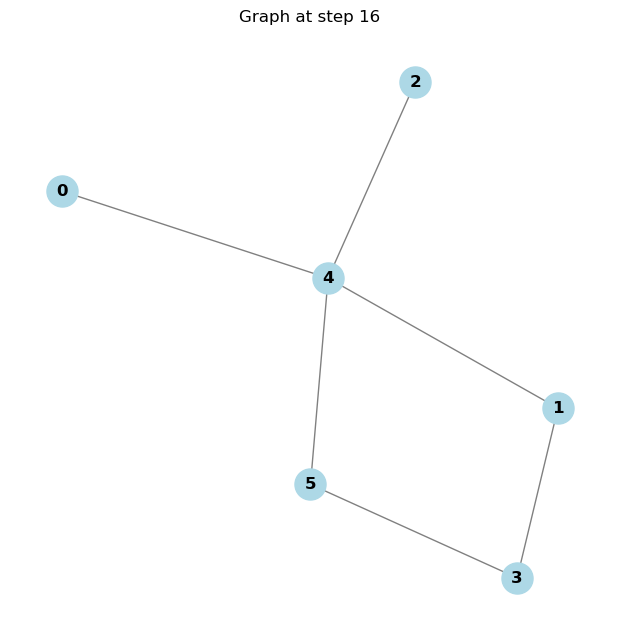

Step 17: Number of integer eingenvalues: 6


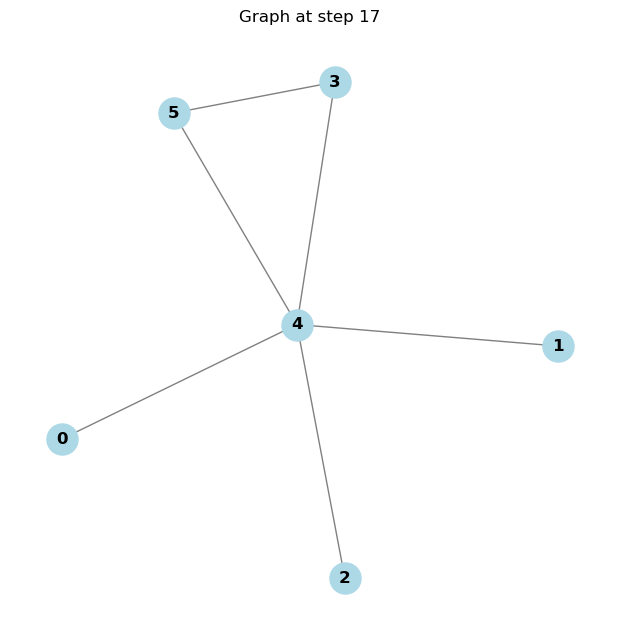

Target reached at step 17


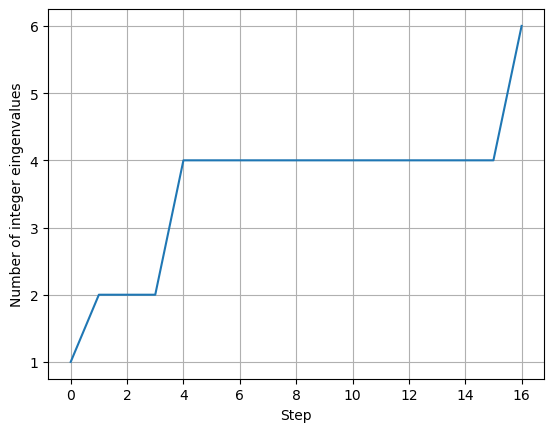

In [137]:
n = 6
G = generate_graph_with_one_cycle(n)
num_steps = 200
target_integer_eigenvalues = n  
integer_eigenvalues_history = []
previous_integer_eigenvalues_count = 0
previous_graph = G 
step = 0
invalid_steps = 0 

while step < num_steps and invalid_steps < 10000: # Nastavimo primerno mejo glede na "potrpežljivost"
    new_G = modify_graph(G.copy(), n)  
    
    if is_graph_isomorphic(previous_graph, new_G):
        invalid_steps += 1 
        continue 
    
    L = laplacian_matrix(new_G)
    integer_eigenvalues = check_integer_eigenvalues(L)
    current_integer_eigenvalues_count = len(integer_eigenvalues)
    
    if current_integer_eigenvalues_count < previous_integer_eigenvalues_count:
        invalid_steps += 1  
        continue  
    
    previous_integer_eigenvalues_count = current_integer_eigenvalues_count
    integer_eigenvalues_history.append(current_integer_eigenvalues_count)

    step += 1
    invalid_steps = 0  
    
    print(f"Step {step}: Number of integer eingenvalues: {len(integer_eigenvalues)}")

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(new_G)  
    nx.draw(new_G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', edge_color='gray')
    plt.title(f"Graph at step {step}")
    plt.show()
    
    if len(integer_eigenvalues) == target_integer_eigenvalues:
        print(f"Target reached at step {step}")
        break

    G = new_G
    previous_graph = new_G  

if invalid_steps >= 10000:
    print("No new valid graphs after 10000 steps, stopping.")

plt.plot(range(len(integer_eigenvalues_history)), integer_eigenvalues_history)
plt.xlabel('Step')
plt.ylabel('Number of integer eingenvalues')
plt.grid(True)
plt.show()

Step 1: Number of integer eigenvalues: 1


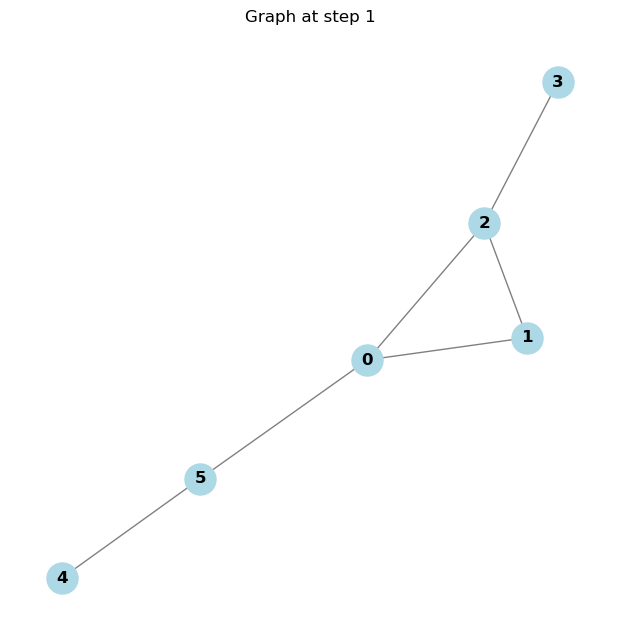

Step 2: Number of integer eigenvalues: 2


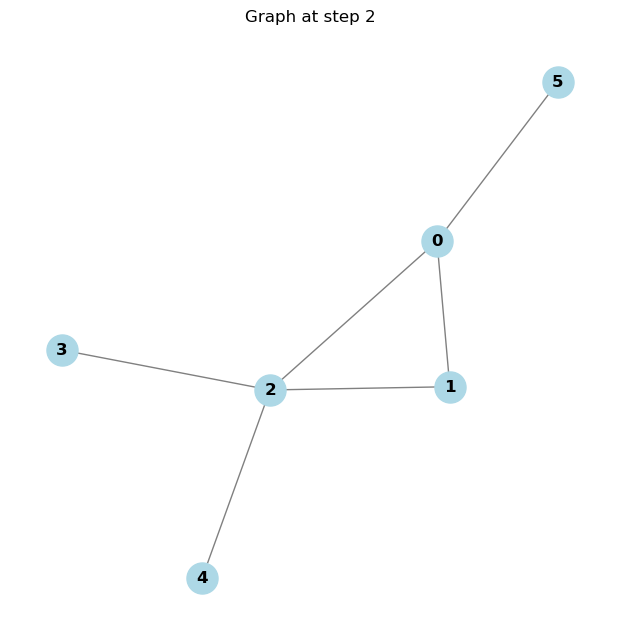

Step 3: Number of integer eigenvalues: 3


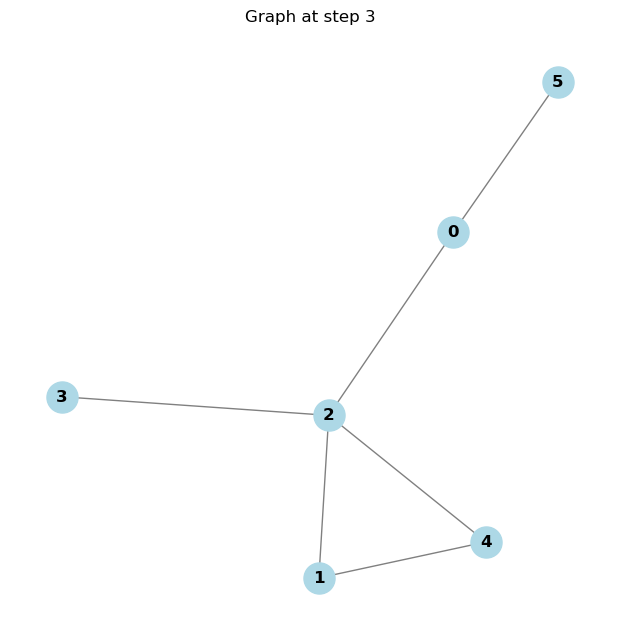

Step 4: Number of integer eigenvalues: 3


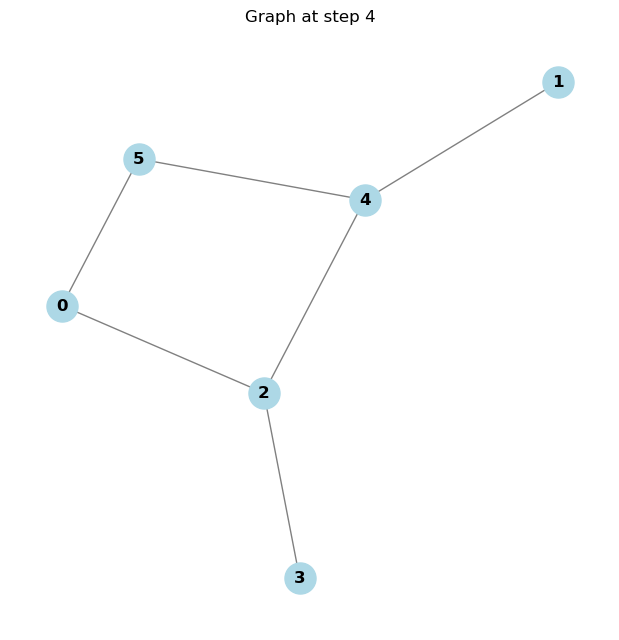

Step 5: Number of integer eigenvalues: 4


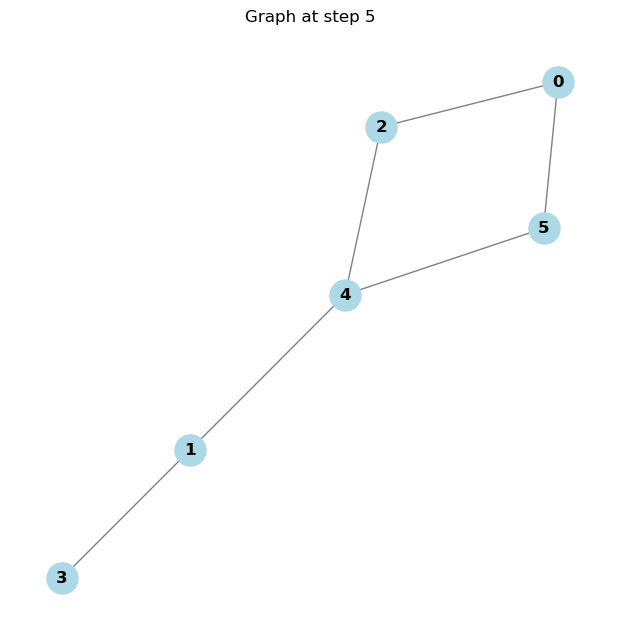

Step 6: Number of integer eigenvalues: 4


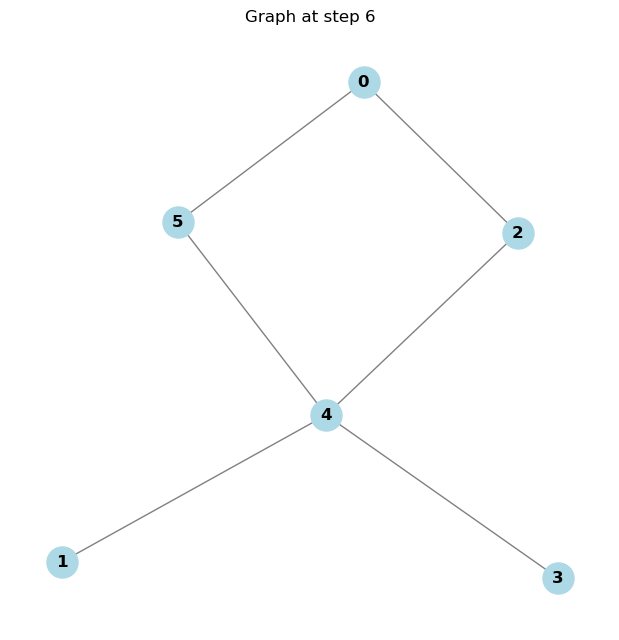

Step 7: Number of integer eigenvalues: 6


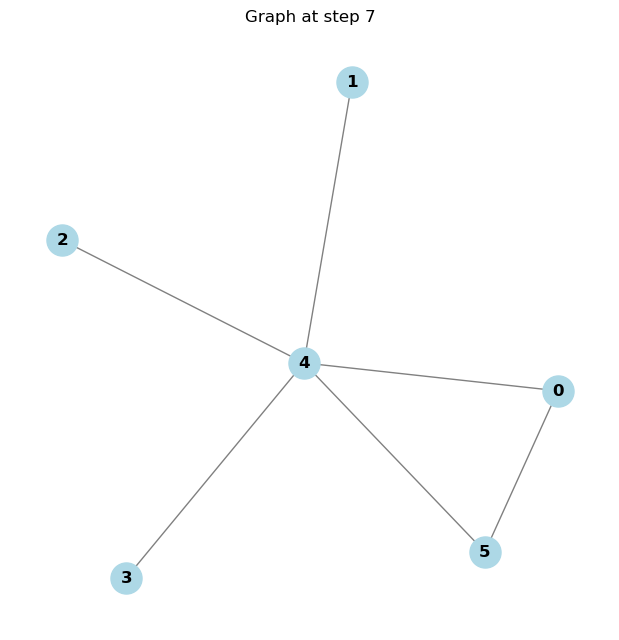

Target reached at step 7


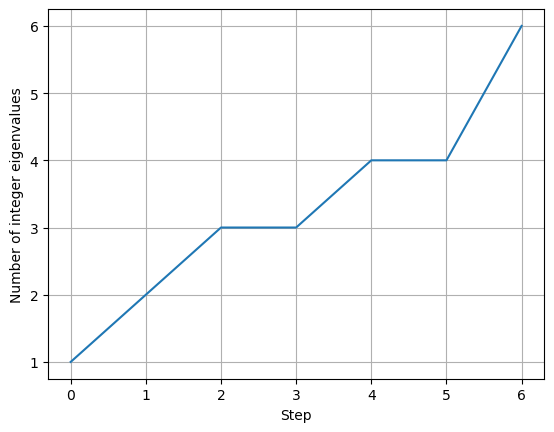

In [146]:
n = 6
G = generate_graph_with_one_cycle(n)
num_steps = 200
target_integer_eigenvalues = n
integer_eigenvalues_history = []
previous_integer_eigenvalues_count = 0
previous_graph = G
step = 0
invalid_steps = 0
previous_graphs = [G]

while step < num_steps and invalid_steps < 10000:  # Nastavimo primerno mejo glede na "potrpežljivost"
    new_G = modify_graph(G.copy(), n)
    is_isomorphic = any(is_graph_isomorphic(new_G, prev_graph) for prev_graph in previous_graphs)
    
    if is_isomorphic: 
        invalid_steps += 1
        continue

    L = laplacian_matrix(new_G)
    integer_eigenvalues = check_integer_eigenvalues(L)
    current_integer_eigenvalues_count = len(integer_eigenvalues)

    if current_integer_eigenvalues_count < previous_integer_eigenvalues_count:
        invalid_steps += 1
        continue

    previous_integer_eigenvalues_count = current_integer_eigenvalues_count
    integer_eigenvalues_history.append(current_integer_eigenvalues_count)

    step += 1
    invalid_steps = 0
    
    print(f"Step {step}: Number of integer eigenvalues: {len(integer_eigenvalues)}")

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(new_G)
    nx.draw(new_G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold', edge_color='gray')
    plt.title(f"Graph at step {step}")
    plt.show()

    if len(integer_eigenvalues) == target_integer_eigenvalues:
        print(f"Target reached at step {step}")
        break

    G = new_G
    previous_graph = new_G
    previous_graphs.append(new_G)  

if invalid_steps >= 10000:
    print("No new valid graphs after 10000 steps, stopping.")

plt.plot(range(len(integer_eigenvalues_history)), integer_eigenvalues_history)
plt.xlabel('Step')
plt.ylabel('Number of integer eigenvalues')
plt.grid(True)
plt.show()